In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms as T,datasets,models
from pathlib import Path
from torch.utils.data import DataLoader

In [2]:
def data_transforms(phase = None):

    if phase == "TRAIN":

        data_T = T.Compose([

                T.Resize(size = (256,256)),
                T.RandomRotation(degrees = (-20,+20)),
                T.CenterCrop(size=224),
                T.ToTensor(),
                T.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])

    elif phase == "TEST" or phase == "VAL":

        data_T = T.Compose([

                T.Resize(size = (224,224)),
                T.ToTensor(),
                T.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])

    return data_T

TYLKO JEŚLI ODPALANE NA COLABIE

In [5]:
from google.colab import drive
drive.mount('/content/drive')
train_dir = "/content/drive/MyDrive/pneumonia/chest_xray/train"
test_dir = "/content/drive/MyDrive/pneumonia/chest_xray/test"
val_dir = "/content/drive/MyDrive/pneumonia/chest_xray/val"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


JEŚLI ODPALANE LOKALNIE:

In [3]:
cwd = os.getcwd()

test_dir = os.path.abspath(".\\pneumonia\\chest_xray\\test")
train_dir = os.path.abspath(".\\pneumonia\\chest_xray\\train")
val_dir = os.path.abspath(".\\pneumonia\\chest_xray\\val")

In [4]:
trainset = datasets.ImageFolder(train_dir,transform = data_transforms("TRAIN"))
testset = datasets.ImageFolder(test_dir,transform = data_transforms("TEST"))
validset = datasets.ImageFolder(val_dir,transform = data_transforms("VAL"))

In [40]:
trainloader = DataLoader(trainset,batch_size = 64,shuffle = True)
validloader = DataLoader(validset,batch_size = 64,shuffle = True)
testloader = DataLoader(testset,batch_size = 64,shuffle = True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape: torch.Size([64, 3, 224, 224])


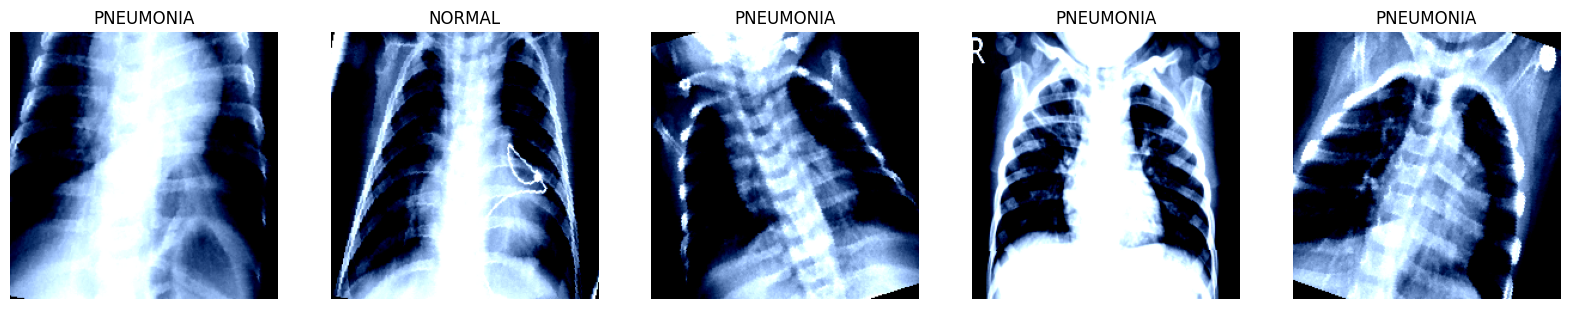

In [45]:
curr_batch = next(iter(trainloader))
images = curr_batch[0]
print("Shape:", images.shape)
fig = plt.figure(figsize=(20,4))
for index, img  in enumerate(images[:5]):
    fig.add_subplot(1,5, index+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis("off")
    plt.title(trainset.classes[first_batch[1][index]])

In [7]:
class pneumonia(nn.Module):
    def __init__(self,num_classes=2):
        super(pneumonia,self).__init__()


        self.conv1=nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)

        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=32 * 112 * 112,out_features=num_classes)

    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=output.view(-1,32*112*112)
        output=self.fc(output)

        return output

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0, verbose=False):

        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose # chcemy zeby nam wypisywalo ile zostalo do striggerowania ES
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

        if self.verbose:
            print(f'Early Stopping Counter: {self.counter}/{self.patience}')

        return self.early_stop

In [8]:
model = pneumonia()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
early_stopping = EarlyStopping(5, 0.5, verbose=True)

In [9]:
N_EPOCH = 15
#losses = []
#val_loss = []


for epoch in range(N_EPOCH):
    model.train()
    curr_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        #losses.append(loss.item())
        curr_loss += loss.item()
    

    # # Check for early stopping
    # early_stopping(val_loss, model)
    # if early_stopping.early_stop:
    #     print("Early stopping triggered. Epoch: ", epoch+1)
    #     break

    # model.train()  # Set the model back to training mode

    print(f"Epoch {epoch + 1} - Training loss: {train_losses[epoch]}")

Epoch 1 - Training loss: 25.577295510507213
Epoch 2 - Training loss: 8.12359048644217
Epoch 3 - Training loss: 4.970910643908854
Epoch 4 - Training loss: 3.440421500572617
Epoch 5 - Training loss: 3.074627180776854
Epoch 6 - Training loss: 2.5072718840546724
Epoch 7 - Training loss: 1.4653791020160807
Epoch 8 - Training loss: 1.0905742510392262
Epoch 9 - Training loss: 0.9519114150479719
Epoch 10 - Training loss: 0.5165665252446537
Epoch 11 - Training loss: 0.33166127638584686
Epoch 12 - Training loss: 0.25551472146137866
Epoch 13 - Training loss: 0.19267768500849786
Epoch 14 - Training loss: 0.12360704071513127
Epoch 15 - Training loss: 0.10604885486295311


In [68]:
correct_count, all_count = 0, 0
for images,labels in testloader:
    for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 3, 224, 224)
    with torch.no_grad():
        logps = model(img)


    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 624

Model Accuracy = 0.8221153846153846


In [67]:
len(testloader)*64

640

In [69]:
torch.save(model, "/content/drive/MyDrive/pneumonia/projekt_model.pth")